In [1]:
import requests
import json
import matplotlib.pyplot as plt

In [2]:
base_url = "https://api.websitecarbon.com/site?url="
history_file = 'History.json'

In [3]:
# To keep track of used links
websites = []
titles = []
cleaner_than_percentages = []
used_links = set()
url_parts_list = []

In [4]:
with open(history_file, 'r') as json_file:
    data = json.load(json_file)
    browser_history = data.get("Browser History", [])[:int(input("Desired Amount: "))]

Desired Amount:  500


In [6]:
for entry in browser_history:
    url = entry.get("url", "")
    title = entry.get("title", "")
    
    if url in used_links:
        continue  # Skip links that have already been used
    
    used_links.add(url)
    
    # Extract the first half of the URL before the domain extension (e.g., .com, .org, .edu)
    url_parts = url.split("/")

    if len(url_parts) < 3:
        continue  # Invalid URL format, skip
    domain_half = url_parts[2].split(".")[0]
    
    # Check if the first half of the URL has been encountered before
    if domain_half in used_links:
        continue
    
    used_links.add(domain_half)
    
    if url:
        selectedwebsite = requests.get(f"{base_url}{url}")
        if selectedwebsite.status_code == 200:
            webdata = selectedwebsite.json()
            green = webdata['green']
            cleanerThan = webdata['cleanerThan']
            statistics = webdata['statistics']
            adjusted_bytes = statistics['adjustedBytes']
            energy = statistics['energy']
            co2 = statistics['co2']
            grams = statistics['co2']['grid']['grams']
            gramsR = statistics['co2']['renewable']['grams']
            litres = statistics['co2']['grid']['litres']
            litresR = statistics['co2']['renewable']['litres']
            output = (
                f"link: {url}\n"
                f"Website: {url_parts[2]}\n"
                f"Is the Website using green energy?: {green}\n"
                f"This website is cleaner than: {cleanerThan}% of other websites\n"
                f"The amount of energy used to search this webpage: {energy}\n"
                f"Amount of CO2 from the grid used in grams: {grams}, and in litres: {litres}\n"
                f"The amount of renewable CO2 used to search this webpage: {gramsR}, and in litres: {litresR}\n"
            )
            print(output)
            websites.append(url)            
            titles.append(title)
            url_parts_list.append(url_parts[2])
            cleaner_than_percentages.append(cleanerThan)
        else:
            print(f"Failed to retrieve data for {url}\n")

Failed to retrieve data for https://www.youtube.com/shorts/csPWSyBI4XM

link: https://umd.instructure.com/calendar#view_name=agenda&view_start=2023-10-13
Website: umd.instructure.com
Is the Website using green energy?: True
This website is cleaner than: 0.99% of other websites
The amount of energy used to search this webpage: 3.220009692013264e-05
Amount of CO2 from the grid used in grams: 0.014232442838698628, and in litres: 0.007916084706884175
The amount of renewable CO2 used to search this webpage: 0.01233907713979483, and in litres: 0.006862994705153883

Failed to retrieve data for https://shib.idm.umd.edu/shibboleth-idp/profile/SAML2/Redirect/SSO?SAMLRequest=fVLLbtswELz3KwTeKcp0gsiEbcCNUdRA0hiW20MuASWuYgJ8qFyybf6%2BlJwgycXX5czOY7lEac0gNime3AF%2BJ8BY%2FLPGoZgeViQFJ7xEjcJJCyhiJ5rN%2FZ3gZSWG4KPvvCEfKJcZEhFC1N6RYrddkSfo2hveVzVVCw70qpfXtJaLns5VXc%2FrRcVn7YwUvyBg5qxIXpGJiAl2DqN0MY8qPqezis7mR14JfiWq60dSbHMO7WScWKcYBxSM4Um3pVa2TFaVoNI0aL2BeKJaDSzH6bUBNrrl7ABKB%2Bgia5oHUmzejN96h8lCaCD80R3

KeyboardInterrupt: 

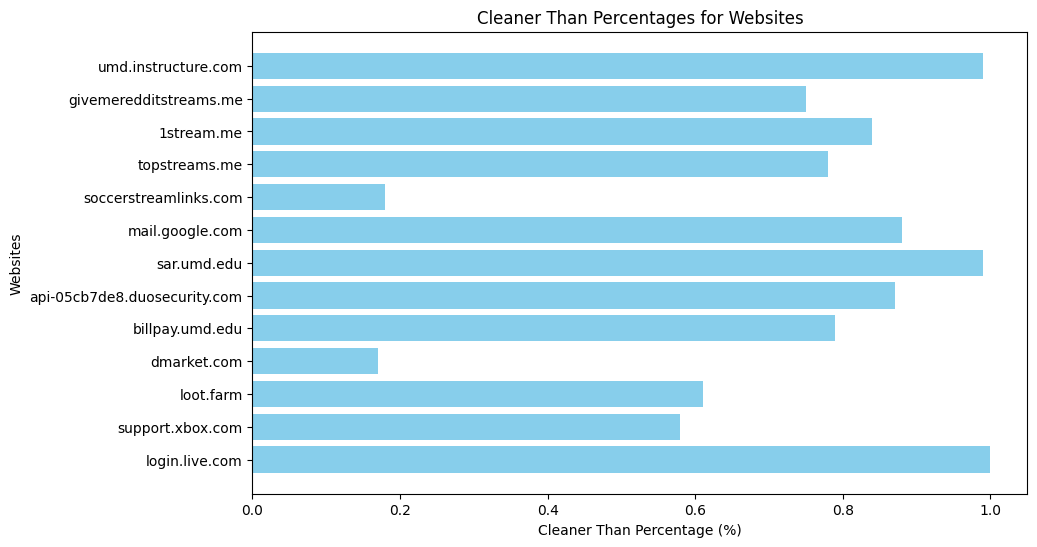

In [7]:
# Plot the data
plt.figure(figsize=(10, 6))
labels = [url_parts for url_parts in url_parts_list]  # Extract domain halves from url_parts
plt.barh(labels, cleaner_than_percentages, color='skyblue')
plt.xlabel('Cleaner Than Percentage (%)')
plt.ylabel('Websites')
plt.title('Cleaner Than Percentages for Websites')
plt.gca().invert_yaxis()  # Invert the y-axis to display websites from top to bottom
plt.show()